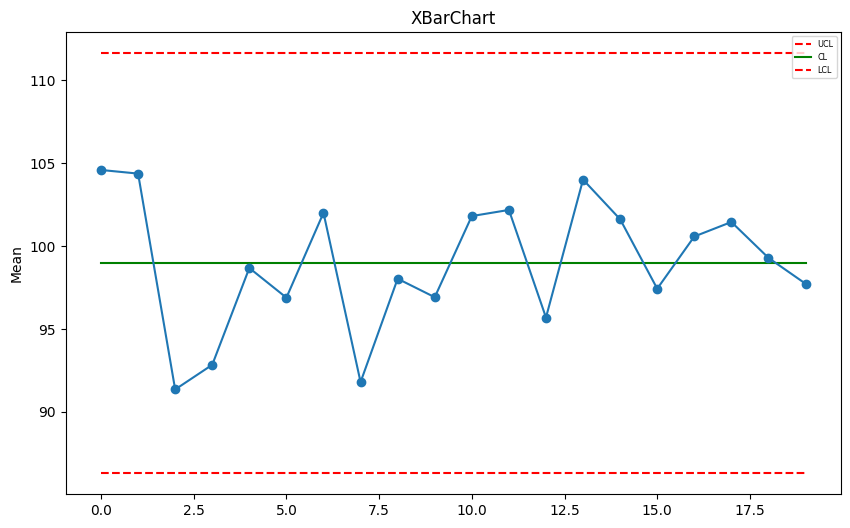

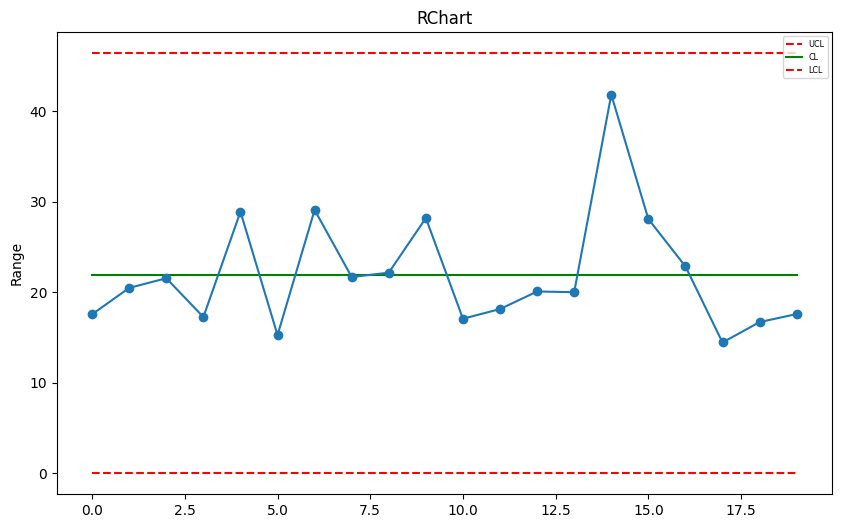

In [1]:
import pandas as pd
from spc_toolbox import XBarChart, RChart

df = pd.read_csv("data/XBar-RChart.csv")

xbarChart = XBarChart()
rChart = RChart()

xbarChart.fit(index=df.index, values=df, axis=1, dispersion_type="range")
xbarChart.plot()

rChart.fit(index=df.index, values=df, axis=1)
rChart.plot()

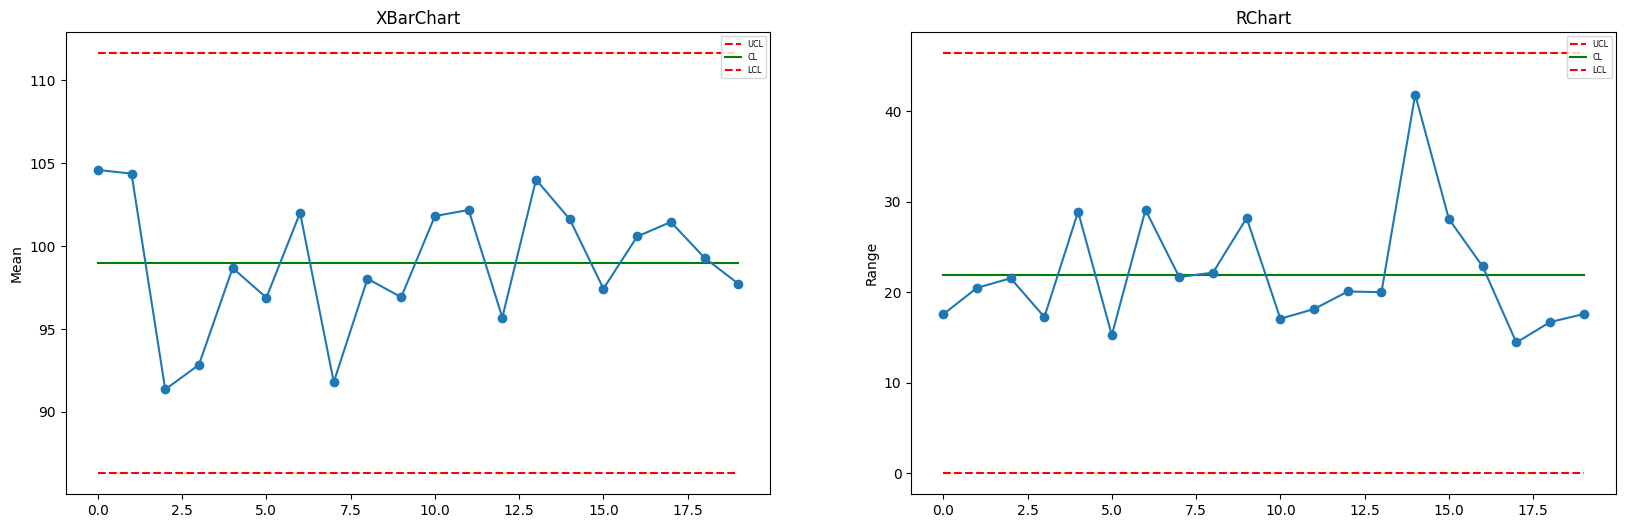

In [2]:
import pandas as pd
from spc_toolbox import XBarChart, RChart

df = pd.read_csv("data/XBar-RChart.csv")

xbarChart = XBarChart()
rChart = RChart()

(xbarChart & rChart).fit(index=df.index, values=df, axis=1, dispersion_type="range")
(xbarChart & rChart).plot()

In [3]:
from spc_toolbox import ControlChart
import numpy as np
import pandas as pd
from spc_toolbox import XBarChart, RChart

df = pd.read_csv("data/XBar-RChart.csv")

xbarChart = XBarChart()
rChart = RChart()

(xbarChart & rChart).fit(index=df.index, values=df, axis=1, dispersion_type="range")

def rule_one_point_gt_k_sigma(chart: ControlChart, k: float) -> pd.Series:
    deviation = chart.y - chart.center_line
    return deviation.abs() > (chart.sigma * k)

def rule_k_points_same_side(chart: ControlChart, k: int) -> pd.Series:
    side = (chart.y > chart.center_line).astype(int)
    return side.rolling(window=k).sum().isin([0, k])

def rule_k_points_all_increasing_or_decreasing(chart: ControlChart, k: int) -> pd.Series:
    diff = chart.y.diff()
    increasing = (diff > 0).astype(int).rolling(window=k-1).sum() == (k-1)
    decreasing = (diff < 0).astype(int).rolling(window=k-1).sum() == (k-1)
    return increasing | decreasing

def rule_k_points_alternating(chart: ControlChart, k: int) -> pd.Series:
    diff = chart.y.diff().fillna(0)
    signs = diff.apply(np.sign)
    alternates = signs != signs.shift()
    return alternates.rolling(window=k).sum() == k

def rule_k_out_of_k1_points_2sigma(chart: ControlChart, k: int) -> pd.Series:
    deviation = chart.y - chart.center_line
    condition = deviation.abs() > (2 * chart.sigma)
    return condition.rolling(window=k+1).sum() >= k

def rule_k_out_of_k1_points_1sigma(chart: ControlChart, k: int) -> pd.Series:
    deviation = chart.y - chart.center_line
    condition = deviation.abs() > chart.sigma
    return condition.rolling(window=k+1).sum() >= k

def rule_k_points_within_1sigma(chart: ControlChart, k: int) -> pd.Series:
    deviation = chart.y - chart.center_line
    condition = deviation.abs() <= chart.sigma
    return condition.rolling(window=k).sum() == k

def rule_k_points_gt_1sigma(chart: ControlChart, k: int) -> pd.Series:
    deviation = chart.y - chart.center_line
    condition = deviation.abs() > chart.sigma
    return condition.rolling(window=k).sum() == k

rules = {
    "rule_one_point_gt_3_sigma": lambda chart: rule_one_point_gt_k_sigma(chart, 3),
    "rule_9_points_in_a_row_on_the_same_side_of_center_line": lambda chart: rule_k_points_same_side(chart, 9),
    "rule_6_points_in_a_row_continuously_increasing_or_decreasing": lambda chart: rule_k_points_all_increasing_or_decreasing(chart, 6),
    "rule_14_points_in_a_row_alternating_up_and_down": lambda chart: rule_k_points_alternating(chart, 14),
    "rule_2_out_of_3_points_gt_2_sigma": lambda chart: rule_k_out_of_k1_points_2sigma(chart, 2),
    "rule_4_out_of_5_points_gt_1_sigma": lambda chart: rule_k_out_of_k1_points_1sigma(chart, 4),
    "rule_15_points_in_a_row_within_1_sigma": lambda chart: rule_k_points_within_1sigma(chart, 15),
    "rule_8_points_in_a_row_outside_1_sigma": lambda chart: rule_k_points_gt_1sigma(chart, 8)
}

results = (xbarChart & rChart).evaluate_rules(rules)
results_df = pd.concat((pd.DataFrame(v) for v in results.values()), axis=1, keys=list(results.keys()))
results_df

XBarChart  \
   rule_one_point_gt_3_sigma   
0                      False   
1                      False   
2                      False   
3                      False   
4                      False   
5                      False   
6                      False   
7                      False   
8                      False   
9                      False   
10                     False   
11                     False   
12                     False   
13                     False   
14                     False   
15                     False   
16                     False   
17                     False   
18                     False   
19                     False   

                                                           \
   rule_9_points_in_a_row_on_the_same_side_of_center_line   
0                                               False       
1                                               False       
2                                               False       
3                                               False       
4                                               False       
5                                               False       
6                                               False       
7                                               False       
8                                               False       
9                                               False       
10                                              False       
11                                              False       
12                                              False       
13                                              False       
14                                              False       
15                                              False       
16                                              False       
17                                              False       
18                                              False       
19                                              False       

                                                                 \
   rule_6_points_in_a_row_continuously_increasing_or_decreasing   
0                                               False             
1                                               False             
2                                               False             
3                                               False             
4                                               False             
5                                               False             
6                                               False             
7                                               False             
8                                               False             
9                                               False             
10                                              False             
11                                              False             
12                                              False             
13                                              False             
14                                              False             
15                                              False             
16                                              False             
17                                              False             
18                                              False             
19                                              False             

                                                    \
   rule_14_points_in_a_row_alternating_up_and_down   
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   
5                                            False   
6                                            False   
7         